In [59]:
import numpy as np
import matplotlib.pyplot as plt

def dircos(incl,decl,azim):
    '''
    c
    c  Subroutine DIRCOS computes direction cosines from inclination
    c  and declination.
    c
    c  Input parameters:
    c    incl:  inclination in degrees positive below horizontal.  
    c    decl:  declination in degrees positive east of true north.  
    c    azim:  azimuth of x axis in degrees positive east of north.
    c
    c  Output parameters:
    c    a,b,c:  the three direction cosines.
    c
    '''
    d2rad = .017453293
    xincl=incl*d2rad
    xdecl=decl*d2rad
    xazim=azim*d2rad 
    a=np.cos(xincl)*np.cos(xdecl-xazim)
    b=np.cos(xincl)*np.sin(xdecl-xazim)
    c=np.sin(xincl)

    return a,b,c

    
    
def mbox(x0,y0,z0,x1,y1,z1,x2,y2,mi,md,fi,fd,m,theta):
    '''
    c
    c  Subroutine MBOX computes the total field anomaly of an infinitely 
    c  extended rectangular prism.  Sides of prism are parallel to x,y,z 
    c  axes, and z is vertical down.  Bottom of prism extends to infinity.
    c  Two calls to mbox can provide the anomaly of a prism with finite 
    c  thickness; e.g., 
    c
    c     call mbox(x0,y0,z0,x1,y1,z1,x2,y2,mi,md,fi,fd,m,theta,t1)
    c     call mbox(x0,y0,z0,x1,y1,z2,x2,y2,mi,md,fi,fd,m,theta,t2)
    c     t=t1-t2
    c
    c  Requires subroutine DIRCOS.  Method from Bhattacharyya (1964).
    c
    c  Input parameters:
    c    Observation point is (x0,y0,z0).  Prism extends from x1 to 
    c    x2, y1 to y2, and z1 to infinity in x, y, and z directions, 
    c    respectively.  Magnetization defined by inclination mi, 
    c    declination md, intensity m.  Ambient field defined by 
    c    inclination fi and declination fd.  X axis has declination 
    c    theta. Distance units are irrelevant but must be consistent.  
    c    Angles are in degrees, with inclinations positive below 
    c    horizontal and declinations positive east of true north.
    c    Magnetization in A/m.
    c
    c  Output paramters:
    c    Total field anomaly t, in nT.
    c
    '''
    alpha = np.zeros((2,))
    beta = np.zeros((2,))
    cm = 1.e-7
    t2nt = 1.e9
    ma,mb,mc = dircos(mi,md,theta)
    fa,fb,fc = dircos(fi,fd,theta)
    fm1=ma*fb+mb*fa
    fm2=ma*fc+mc*fa
    fm3=mb*fc+mc*fb
    fm4=ma*fa
    fm5=mb*fb
    fm6=mc*fc
    alpha[0]=x1-x0
    alpha[1]=x2-x0
    beta[0]=y1-y0
    beta[1]=y2-y0
    h=z1-z0
    t=0.
    hsq=h**2
    #print(z1)
    for i in [0,1]:
        alphasq=alpha[i]**2
        for j in [0,1]:
            sign=1.
            if i!=j:
                sign = -1.
                #print('{:d} {:d} here'.format(i,j))
            r0sq=alphasq+beta[j]**2+hsq
            r0=np.sqrt(r0sq)
            r0h=r0*h
            alphabeta=alpha[i]*beta[j]
            arg1=(r0-alpha[i])/(r0+alpha[i])
            arg2=(r0-beta[j])/(r0+beta[j])
            arg3=alphasq+r0h+hsq
            arg4=r0sq+r0h-alphasq
            tlog=fm3*np.log(arg1)/2.+fm2*np.log(arg2)/2.-fm1*np.log(r0+h)
            tatan=-fm4*np.arctan2(alphabeta,arg3)-fm5*np.arctan2(alphabeta,arg4)+fm6*np.arctan2(alphabeta,r0h)
            t=t+sign*(tlog+tatan)
    t=t*m*cm*t2nt

    return t


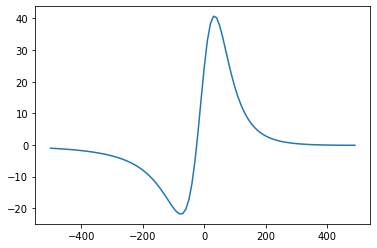

In [76]:
# Values from Nimmo (2000)
obs_x = 0.
obs_y = 0.
obs_z = 100.
x1 = -10.
x2 = 10.
y1 = -1000.
y2 = 1000.
z1 = 5.
mi = 60.
md = 0.
fi = 60.
fd = 0.
m = 10.
theta = 0.

layer_thickness = 10.

profile_X = np.arange(-500.,500.,10.)
profile_Z = []
for obs_x in profile_X:
    t1 = mbox(obs_x,obs_y,obs_z,x1,y1,z1,x2,y2,mi,md,fi,fd,m,theta)
    t2 = mbox(obs_x,obs_y,obs_z,x1,y1,z1+layer_thickness,x2,y2,mi,md,fi,fd,m,theta)
    profile_Z.append(t1-t2)
    #profile_Z.append(t1)
    
plt.plot(profile_X,profile_Z)